In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("soccerclubs.csv")

# かな辞書作り

- "ーアイウエオカキクケコサシスセソタチツテトナニヌネノハヒフヘホマミムメモヤ,ユ,ヨラリルレロワ,,,ヲ"
- 濁音 : 50～74
- 半濁音 : 75～79


In [2]:
kana = "アイウエオカキクケコサシスセソタチツテトナニヌネノハヒフヘホマミムメモヤ,ユ,ヨラリルレロワ,,,ヲ"
gana = "ガギグゲゴザジズゼゾダヂヅデドバビブベボ,,ヴ,,"
pana = "パピプペポ"
yo = "ァィゥェォャ,ュ,ョ"
S = kana+gana+pana+yo+"ー"+"ン"+"ッ"
kana_rev = {i:s for i,s in enumerate(S)}
kana_set = {s:i for i,s in enumerate(S)}


# どの文字が一番多いか


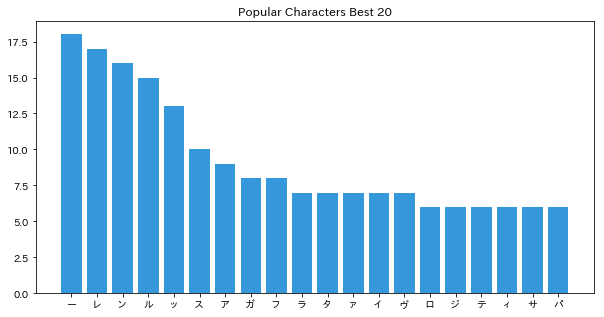

In [3]:
def cnt_popular_chars(names):
    cnts = np.ones(100)
    for name in names:
        for s in name:
            # カタカナのみ
            try:
                ind = kana_set[s]
                cnts[ind]+=1
            except:
                continue
    # [cnts[a].sum(),cnts[i].sum(),cnts[u].sum(),cnts[e].sum(),cnts[o].sum()]
    ind = cnts.argsort()[::-1] #ソート順
    return ind,cnts


ind,cnts = cnt_popular_chars(df.NAME.values)
# ind,cnts = cnt_popular_chars(df[df.J==1].NAME.values) #J1
plt.figure(figsize=(10,5))
a = [kana_rev[i] for i in ind[:20]]
plt.bar(range(20),cnts[ind[:20]],tick_label=a,color="#3498db")
plt.title("Popular Characters Best 20")
plt.savefig("sc_pop_char.png")


## これが入っているチームはどれくらい？
- "ン"
- "ッ"
- "-"
- "濁音/半濁音"
- "拗音"

In [4]:
def cnt_specials(names):
    cnt_team = 0
    cnt_tt = 0 #ッを含む
    cnt_n = 0 #ンを含む
    cnt_l = 0 #ーを含む
    cnt_any = 0 # ッ or ン or ーを含む
    cnt_daku = 0 #濁音を含む
    cnt_any_daku = 0 #上記すべてのうちどれかを含む
    for name in names:
        flg_tt = False
        flg_n = False
        flg_l = False
        flg_daku = False
        for s in name:
            # カタカナのみ
            try:
                ind = kana_set[s]
                cnts[ind]+=1
                if ind == kana_set["ン"]:flg_n = True
                elif ind == kana_set["ッ"]:flg_tt = True
                elif ind == kana_set["ー"]:flg_l = True
                elif 49 < ind < 80 : flg_daku = True
            except:
                continue
        cnt_team += 1
        if flg_n : cnt_n+=1
        if flg_tt: cnt_tt+=1
        if flg_l : cnt_l+=1
        if flg_daku :cnt_daku+=1
        if flg_n or flg_tt or flg_l:
            cnt_any += 1
        if flg_n or flg_tt or flg_l or flg_daku:
            cnt_any_daku += 1
    return cnt_team,cnt_n, cnt_tt,cnt_l,cnt_any,cnt_daku,cnt_any_daku
# 各Jリーグについて調べている
J1 = cnt_specials(df[df.J == 1].NAME)
J2 = cnt_specials(df[df.J == 2].NAME)
J3 = cnt_specials(df[df.J == 3].NAME)
lists = ["all","ン","ッ","ー","ンッー","濁音","どれか"]
for l,j1,j2,j3 in zip(lists,J1,J2,J3):
    print("{}:\t{:.2f} {:.2f} {:.2f}".format(l,j1/J1[0],j2/J2[0],j3/J3[0]))

all:	1.00 1.00 1.00
ン:	0.37 0.23 0.17
ッ:	0.21 0.18 0.22
ー:	0.26 0.27 0.28
ンッー:	0.63 0.50 0.61
濁音:	0.63 0.59 0.50
どれか:	0.84 0.68 0.72


## どの母音が一番多いか

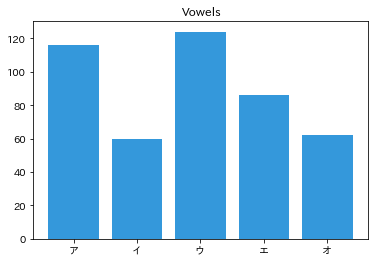

In [5]:
aiueo = []
for i in range(5):
    aiueo.append(cnts[i:80:5].sum())
plt.title("Vowels")
plt.bar(range(5),aiueo,tick_label=["ア","イ","ウ","エ","オ"],color="#3498db")
plt.savefig("sc_vowels.png")

## どの子音が一番多いか

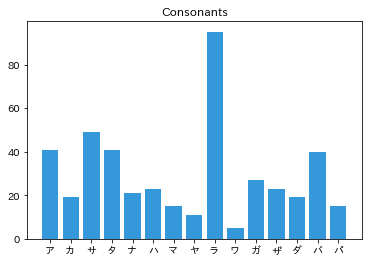

In [6]:
cnt_combine = np.array([c for c in cnts])
cnt_combine[67] += cnt_combine[72]
akstnhyrwgzdbp = []
label = []
for i in range(16):
    #ヴを除く
    if i == 14:
        continue
    # print(kana_rev[5*i],cnt_combine[5*i:5*i+5].sum())
    akstnhyrwgzdbp.append(cnt_combine[5*i:5*i+5].sum())
    label.append(kana_rev[5*i])
plt.title("Consonants")
plt.bar(range(15),akstnhyrwgzdbp,tick_label=label,color="#3498db")
plt.savefig("sc_consonants.png")

## 連結

その語は、
- 何文字中
- 何文字目で
- 前の語は何で
- 後の語は何
かを調べる

In [7]:
for i in ind[:3]:
    c = kana_rev[i]
    for name in df.NAME.values:
        if c in name:
            num = len(name)
            ind_c = name.index(c)
            if num-1 == ind_c:c_aft = ""
            else:c_aft = name[ind_c+1]
            if ind_c == 0: c_bef = ""
            else: c_bef = name[ind_c-1]
            print(c,num,ind_c+1,c_bef,c_aft)

ー 6 5 ド レ
ー 6 5 ラ ズ
ー 6 5 タ レ
ー 5 4 マ レ
ー 5 4 ニ タ
ー 6 5 ア ノ
ー 7 2 ホ リ
ー 7 5 ィ ジ
ー 7 6 ォ レ
ー 5 3 エ ゲ
ー 7 5 ァ レ
ー 10 6 ル ジ
ー 4 3 タ レ
ー 5 4 ナ レ
ー 6 5 マ レ
ー 6 5 ラ レ
レ 6 6 ー 
レ 6 6 ー 
レ 3 1  ッ
レ 5 5 ー 
レ 4 2 セ ッ
レ 7 4 フ ッ
レ 4 1  イ
レ 7 4 ビ ッ
レ 7 7 ー 
レ 4 1  ノ
レ 7 6 ー ン
レ 4 4 ー 
レ 5 5 ー 
レ 4 2 セ ッ
レ 6 6 ー 
レ 6 6 ー 
ン 6 2 コ サ
ン 6 2 ア ト
ン 6 3 ロ タ
ン 3 2 ガ バ
ン 3 3 ガ 
ン 5 3 ラ パ
ン 7 2 サ フ
ン 6 2 モ テ
ン 7 3 ァ フ
ン 5 5 ゲ 
ン 3 2 サ ガ
ン 7 7 レ 
ン 9 2 ガ バ
ン 6 5 ァ ツ
ン 6 3 ァ ラ


## 2音節では何が多い？

ーレ: 9
レッ: 5
スパ: 3
ガン: 3
ッソ: 3
ディ: 3
ファ: 3
ユナ: 3
ナイ: 3
イテ: 3


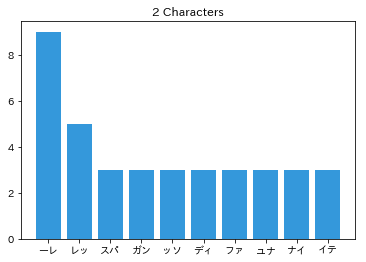

In [8]:
def cnt_pop_2char(names):
    bi = {}
    for name in names:
        n_name = len(name)
        for i in range(n_name-1):
            if name[i] in kana_rev.values() and name[i+1] in kana_rev.values():
                s2 = name[i]+name[i+1]
                if s2 not in bi.keys():
                    bi[s2] = 1
                else:
                    bi[s2] += 1
    return bi

bi = cnt_pop_2char(df.NAME.values)

# 可視化
Ss, labels = [], []
for k, v in sorted(bi.items(), key=lambda x: x[1],reverse=True)[:10]:
    print(str(k) + ": " + str(v))
    Ss.append(v)
    labels.append(k)
plt.title("2 Characters")
plt.bar(range(len(Ss)),Ss,tick_label=labels,color="#3498db")
plt.savefig("sc_2characters.png")